In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
entries = {}
for ent in os.listdir():
    name, filetype = os.path.splitext(ent)
    if filetype.lower() == ".txt":
        with open(ent, "r") as f:
            entries[name] = f.read()
            
results = {}
# format text
for name in entries:
    # check if there's anything
    content = entries[name].strip()
    if len(content) < 2:
        continue
    content = content.split("\n")
    content = [x.split(": ") for x in content]
    container = {}
    for ent in content:
        key, value = ent
        container[key] = float(value)
        
    # setup name properly
    num_sents, _, direction = name.split("_")[1:]
    if num_sents == "lg":
        num_sents = "1500k"
    name = "_".join([num_sents, direction])
    
    results[name] = container

In [3]:
statnames = [x for x in results[list(results.keys())[0]].keys()]
statnames

['Bleu_1', 'Bleu_2', 'Bleu_3', 'Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']

In [4]:
stat_title_sub = {x : x for x in statnames}
stat_title_sub['Bleu_1'] = "$BLEU_1$"
stat_title_sub['Bleu_2'] = "$BLEU_2$"
stat_title_sub['Bleu_3'] = "$BLEU_3$"
stat_title_sub['Bleu_4'] = "$BLEU_4$"
stat_title_sub['ROUGE_L'] = "$ROUGE_L$"
stat_title_sub['SkipThoughtsCosineSimilairty'] = "Skip Thoughts Cosine Similarity"
stat_title_sub['EmbeddingAverageCosineSimilairty'] = "Embedding Average Cosine Similarity"
stat_title_sub['VectorExtremaCosineSimilarity'] = "Vector Extrema Cosine Similarity"
stat_title_sub['GreedyMatchingScore'] = "Greedy Matching Score"

In [5]:
legend_sub = {"fren" : r"$FR \rightarrow EN$", "enfr":r"$EN \rightarrow FR$"}

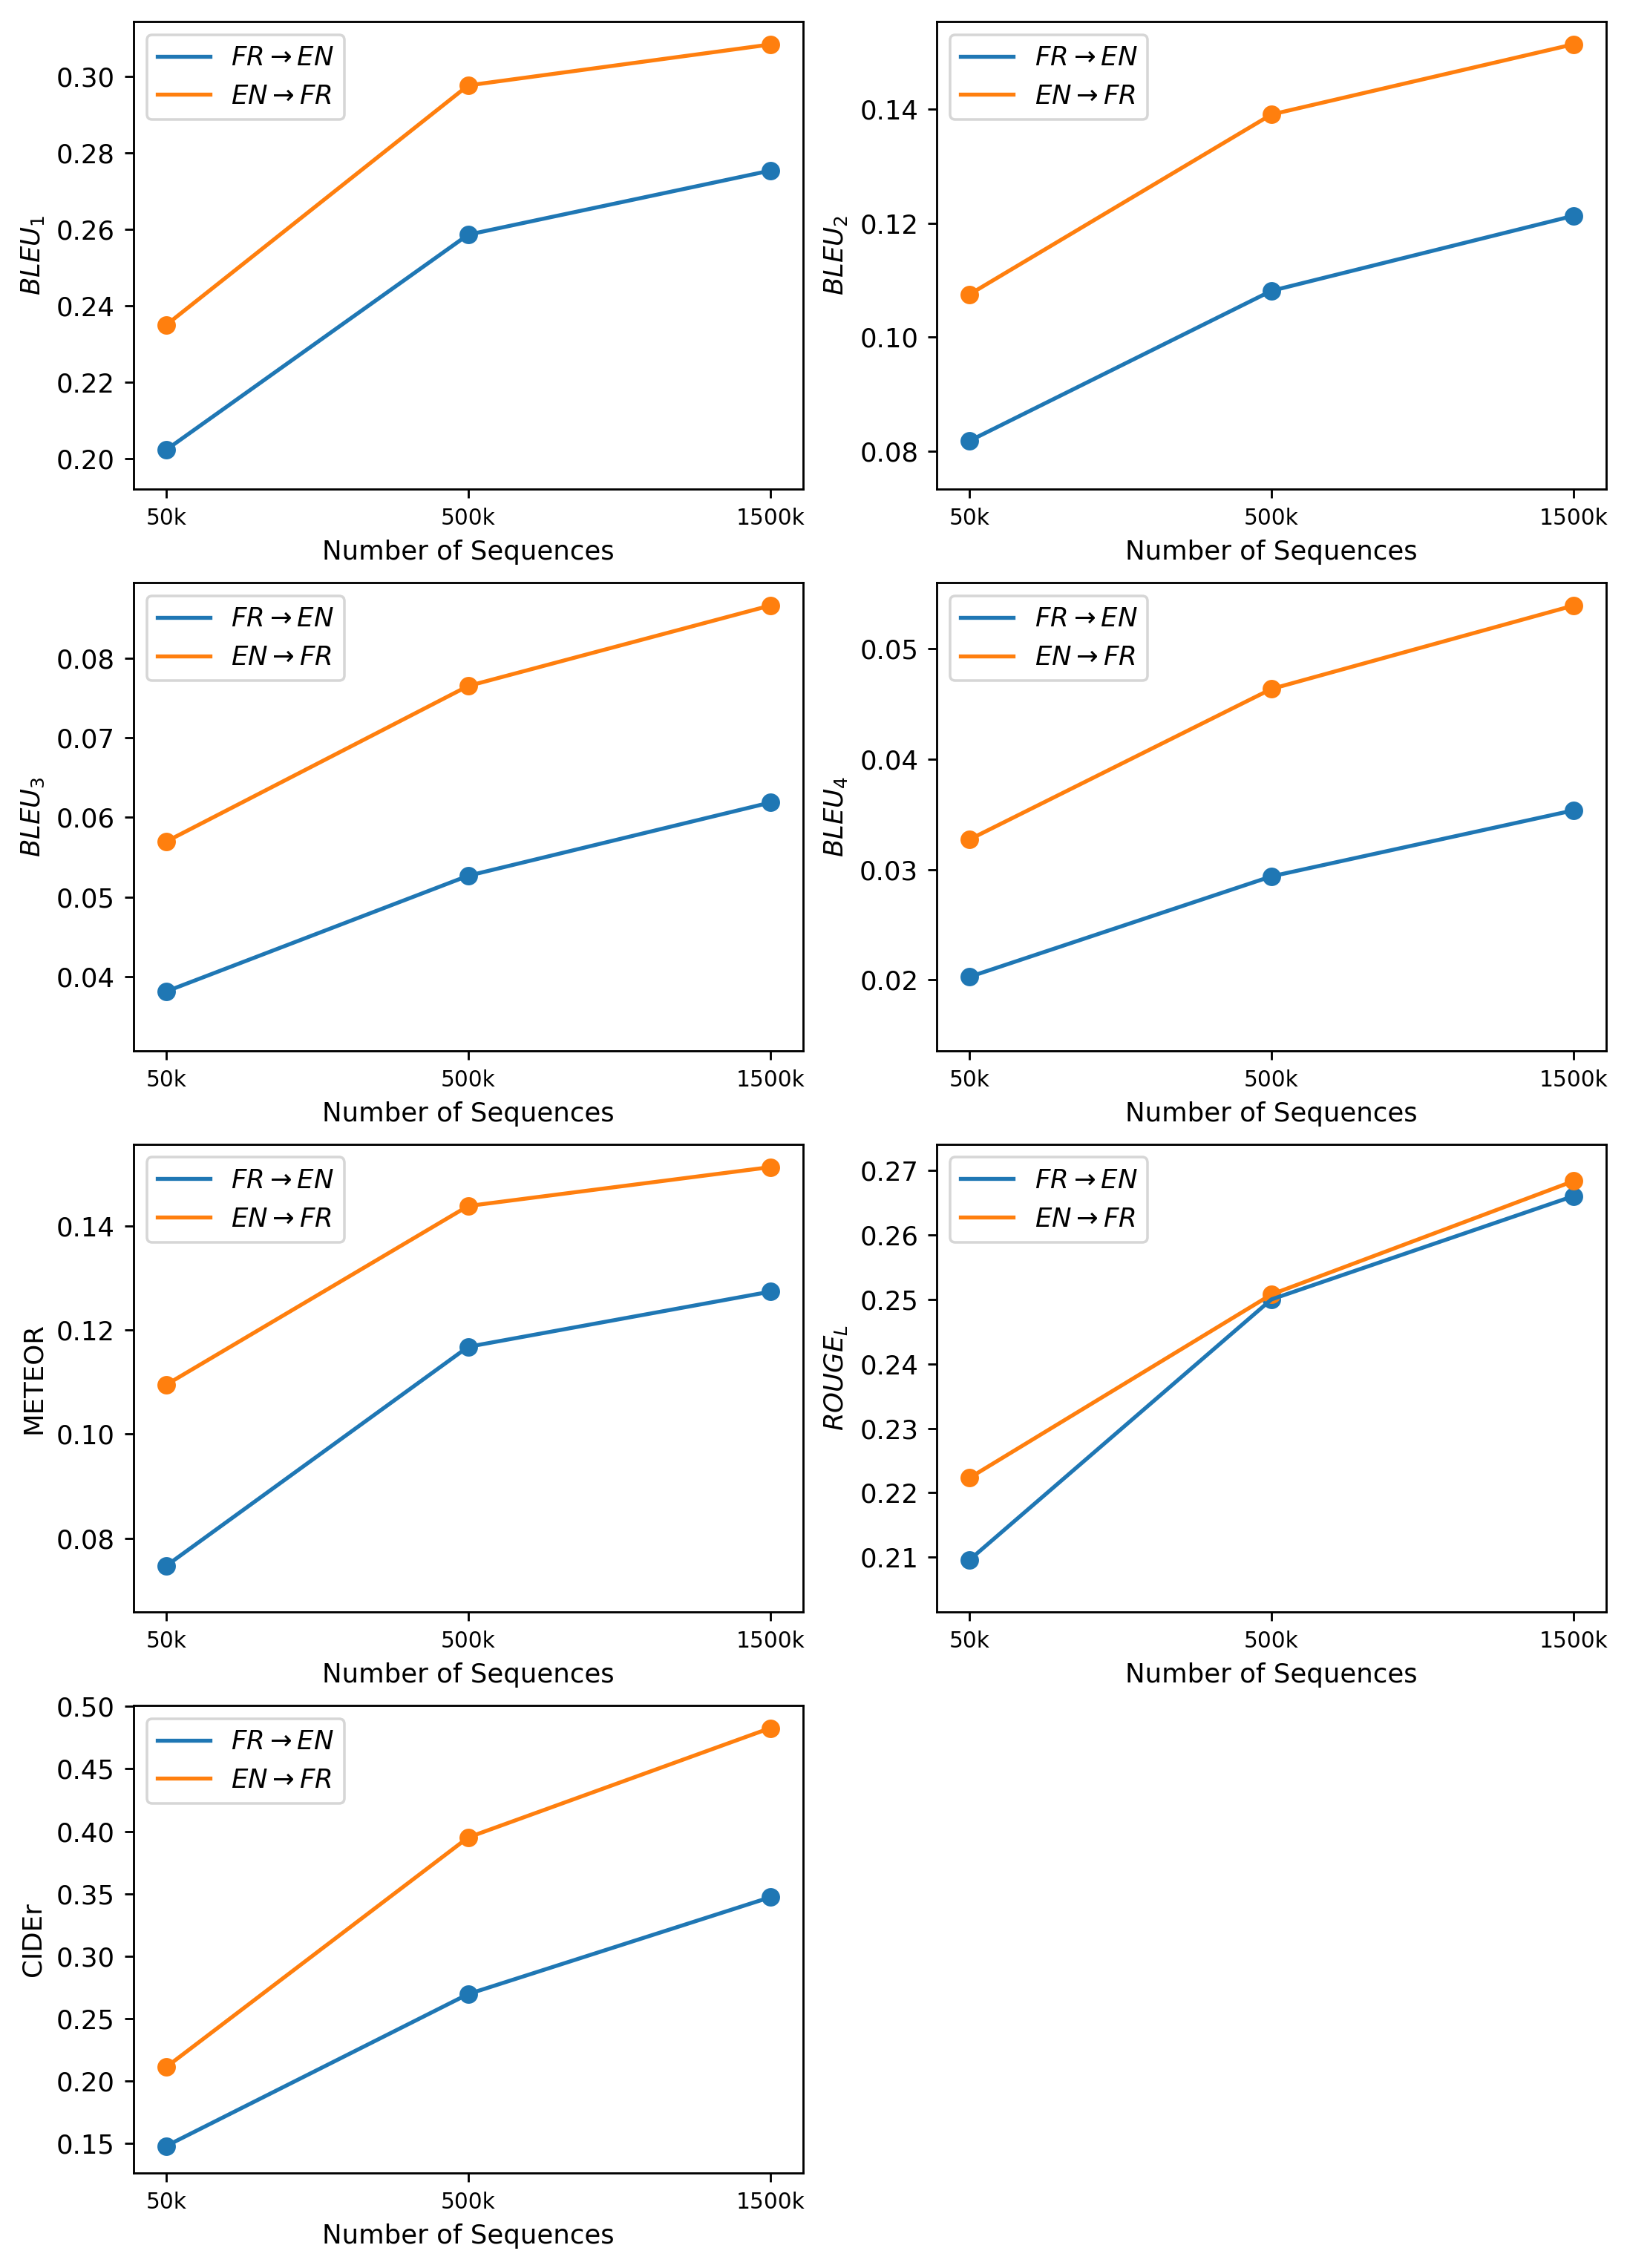

In [9]:
chart_num = 420
fig = plt.figure(figsize=(10,15), dpi=256)
fig.patch.set_facecolor('white')
for stat in statnames:
    chart_num += 1
#     plt.subplot(321)
    
    title = stat_title_sub[stat]
    measurements = {}
    for entry in sorted(list(results.keys()), reverse=True):
        size, direction = entry.split("_")
        value = results[entry][stat]
#         print(stat, size, direction, value)
        if direction not in measurements:
            measurements[direction] = {}
        measurements[direction][size] = value
    
    
    legend = []
    sizes = measurements[direction].keys()

    
    plt.subplot(chart_num)

    for direction in measurements:
        legend.append(direction)
        values = [measurements[direction][k] for k in measurements[direction]]
        x_values = [i for i in range(len(values))]
        plt.scatter(x_values, values)
        plt.plot(x_values, values)
        
    plt.xticks(range(len(sizes)), sizes, size='small')
    
    legend = [legend_sub[x] for x in legend]
    plt.legend(legend)
#     plt.title(title)
    plt.xlabel('Number of Sequences')
    plt.ylabel(title)
# plt.show()
plt.savefig('stats.pdf')
#     break